<a href="https://www.kaggle.com/code/anuhskaa/fraud-analysis-decision-tree-classifier?scriptVersionId=156290610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [2]:
data=pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
data.shape

(6362620, 11)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
#checking for null values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

**EXPLORATORY DATA ANANLYSIS**

In [9]:
#importing libraries for graphplotting 

import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

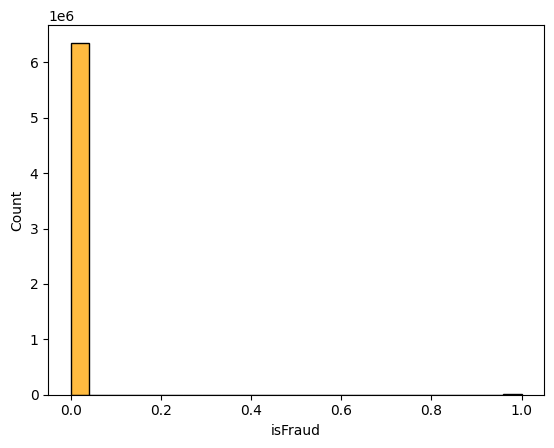

In [10]:
sns.histplot(x=data['isFraud'],color='orange',bins='auto')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

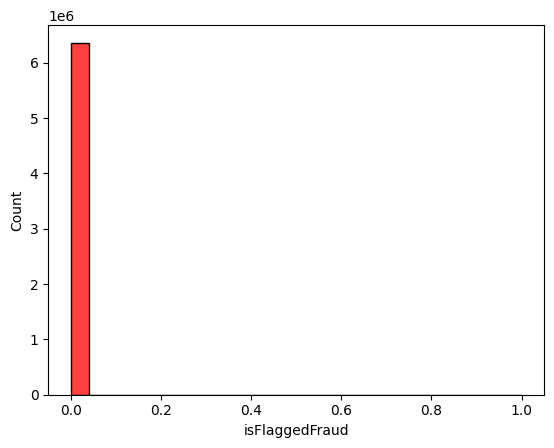

In [11]:
sns.histplot(x=data['isFlaggedFraud'],color='red',bins='auto')
plt.show

In [12]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
# creating new colums and deleting the old columns

data['Org_money']= data['oldbalanceOrg']- data['newbalanceOrig']
data['Dest_money']= data['newbalanceDest'] -data['oldbalanceDest']
data.drop(['oldbalanceDest','oldbalanceOrg','newbalanceOrig','newbalanceDest'],axis=1,inplace=True)

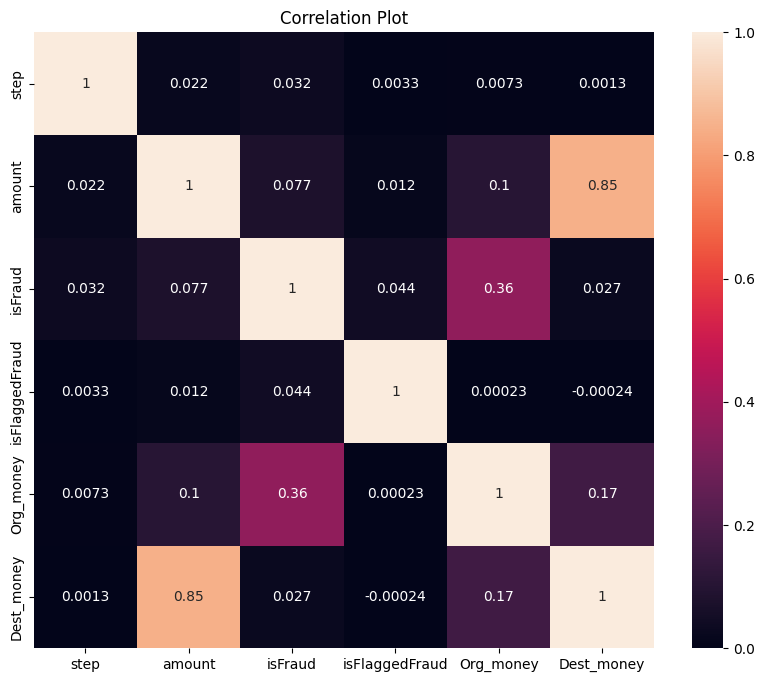

In [14]:
# Select the independent variables of interest
ind_col= ['step','amount', 'isFraud','isFlaggedFraud','Org_money','Dest_money']

# Create a correlation matrix
corr_matrix = data[ind_col].corr()

# Generate a correlation plot (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)

# Set plot title
plt.title('Correlation Plot')

# Display the plot
plt.show()

step


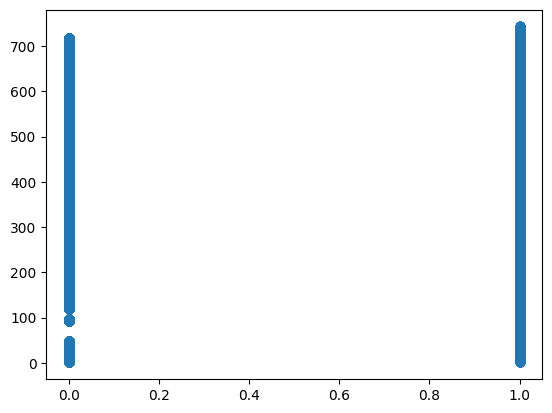

amount


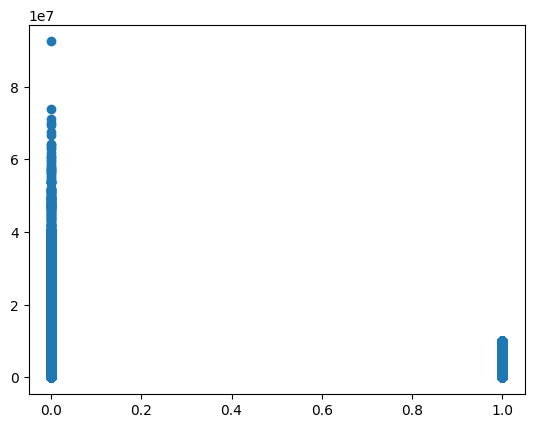

Org_money


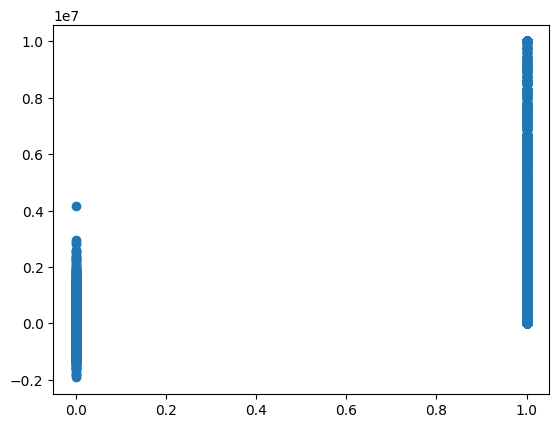

Dest_money


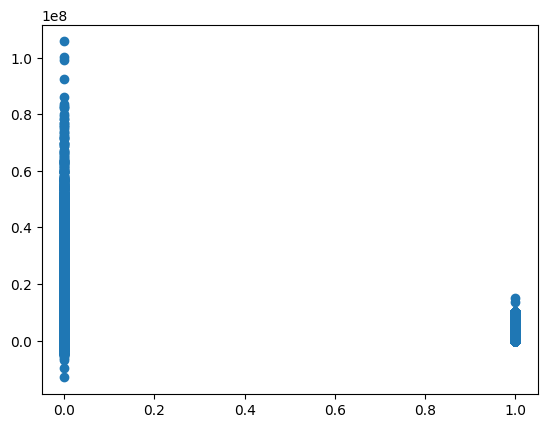

In [15]:
#creating a scatter plot for specified columns
numerical_columns=['step',  'amount', 'Org_money', 'Dest_money']
for i in numerical_columns:
    print(i)
    plt.scatter(data['isFraud'],data[i])
    plt.show()

here negative Org_money means its a loss

/tmp/ipykernel_20/1821173288.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


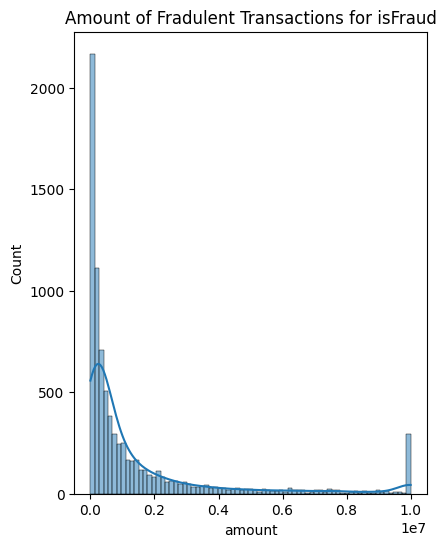

In [16]:
figure = plt.subplots(figsize = (10, 6))

plt.subplot(121)
ax = sns.histplot(data=data[data['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')

plt.show()

***It can be seen that fraud transactions are done where amount is low***

In [17]:
# Data Preprocessing
#checking for outliers
numerical_columns = ['step','amount','Org_money','Dest_money']

In [18]:
# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}
for col in numerical_columns:
    # Calculate the IQR for each numerical column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify potential outliers using the IQR method
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) |
                (data[col] > (Q3 + 1.5 * IQR)))
     # Count the number of outliers for the current column
    num_outliers = outliers.sum()
    
    # Store the count in the dictionary
    outliers_count[col] = num_outliers

# Display the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'step': 102688
Number of outliers in column 'amount': 338078
Number of outliers in column 'Org_money': 2139299
Number of outliers in column 'Dest_money': 886695


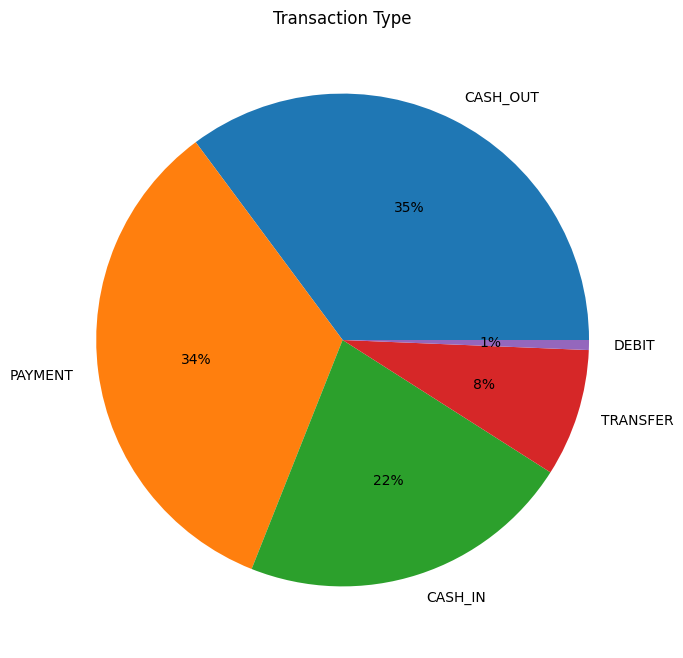

In [19]:
plt.figure(figsize=(10,8))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

**MODELLING**

In [20]:
#importing libraries for modelling

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [21]:
from sklearn.preprocessing import LabelEncoder

# for converting columns whose typ is object for modelling purpose

encoder = {}
for i in data.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    data[i] = encoder[i].fit_transform(data[i])


In [22]:
# Split the data into features (X) and target (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [23]:

x = data[['step','type', 'amount', 'Org_money', 'nameDest', 'Dest_money', 'isFlaggedFraud']]
y= data['isFraud']

In [24]:
#scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
#cerating a performance function

def performance(model,x_test,y_test):
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred) *100
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC: {roc_auc}')
    print(f'Confusion Matrix:\n{conf_matrix}')

1. Logistic regression

In [27]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [28]:
log_score1=log_reg.score(x_train,y_train) *100
log_test=log_reg.score(x_test,y_test)*100
print("train score",log_score1)
print("test score",log_test)

train score 99.91006063539862
test score 99.90947125555196


In [29]:
performance(log_reg,x_test,y_test)

Accuracy: 99.90947125555196
Precision: 0.9358288770053476
Recall: 0.31992687385740404
F1 Score: 0.4768392370572207
ROC AUC: 0.6599492735478085
Confusion Matrix:
[[1270847      36]
 [   1116     525]]


2. XGB classifier  

In [30]:
import xgboost as xg
xgb= xg.XGBClassifier(max_depth=7)
  
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
xgb_score1=xgb.score(x_train,y_train) *100

xgb_test=xgb.score(x_test,y_test)*100
print("train score",xgb_score1)
print("test score",xgb_test)

train score 99.97652303610776
test score 99.97092392756443


In [32]:
performance(xgb,x_test,y_test)

Accuracy: 99.97092392756443
Precision: 0.9724907063197026
Recall: 0.7970749542961609
F1 Score: 0.8760884125920965
ROC AUC: 0.89852292033994
Confusion Matrix:
[[1270846      37]
 [    333    1308]]


3. Desicion tree classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dlf = DecisionTreeClassifier(random_state=0)
dlf.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [34]:
dlf_score1=dlf.score(x_train,y_train)*100
dlf_test=dlf.score(x_test,y_test)*100
print("train score",dlf_score1)
print("test score",dlf_test)

train score 100.0
test score 99.94027617553775


In [35]:
performance(dlf,x_test,y_test)

Accuracy: 99.94027617553775
Precision: 0.75927015891701
Recall: 0.7861060329067642
F1 Score: 0.7724550898203593
ROC AUC: 0.8928921047093427
Confusion Matrix:
[[1270474     409]
 [    351    1290]]


4. Graphical view of the modelling performance  

In [36]:
def confu_matrix(model,x_test,y_test):
    y_pred=model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    print(model)
    plt.title('Confusion Matrix ')
    plt.show()

LogisticRegression(max_iter=500)


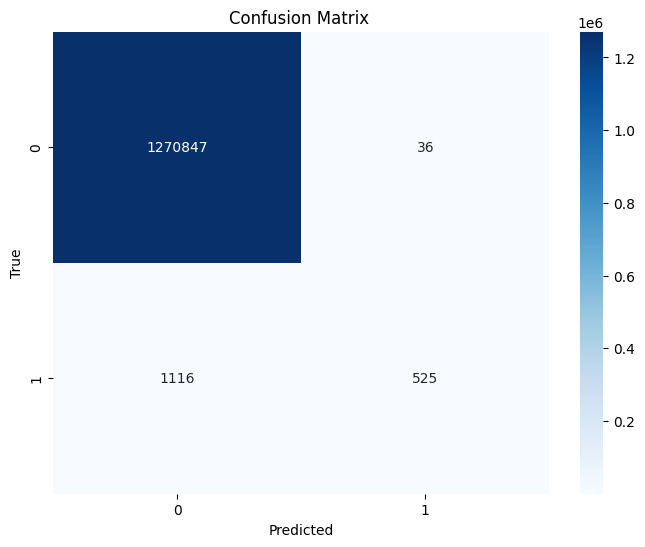

In [37]:
confu_matrix(log_reg,x_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


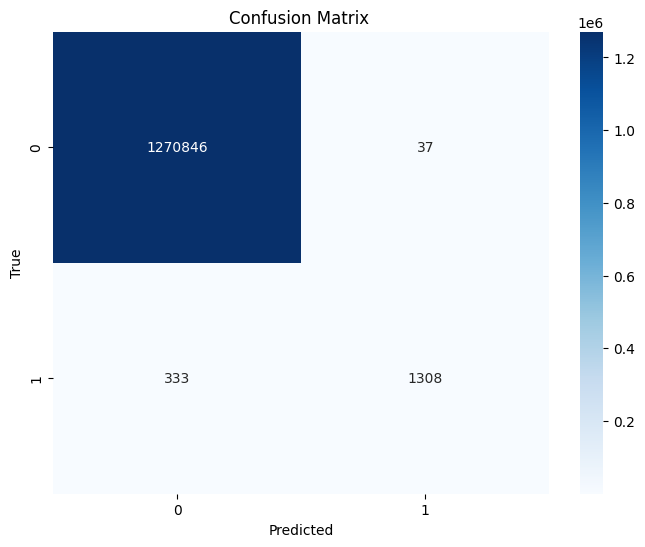

In [38]:
confu_matrix(xgb,x_test, y_test)

DecisionTreeClassifier(random_state=0)


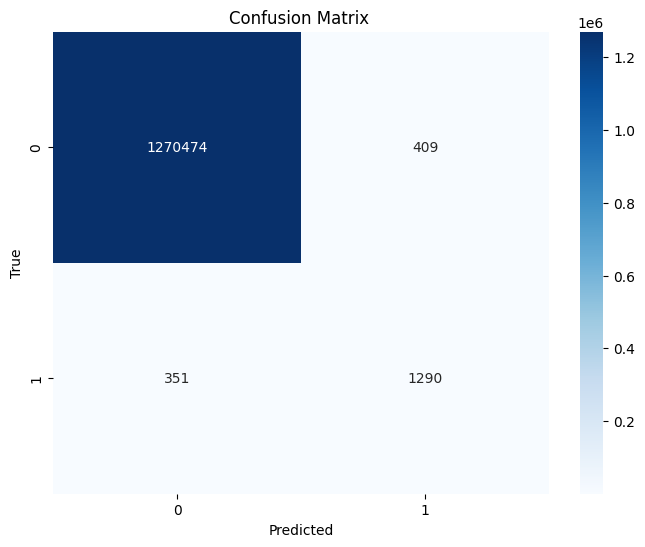

In [39]:
confu_matrix(dlf,x_test, y_test)

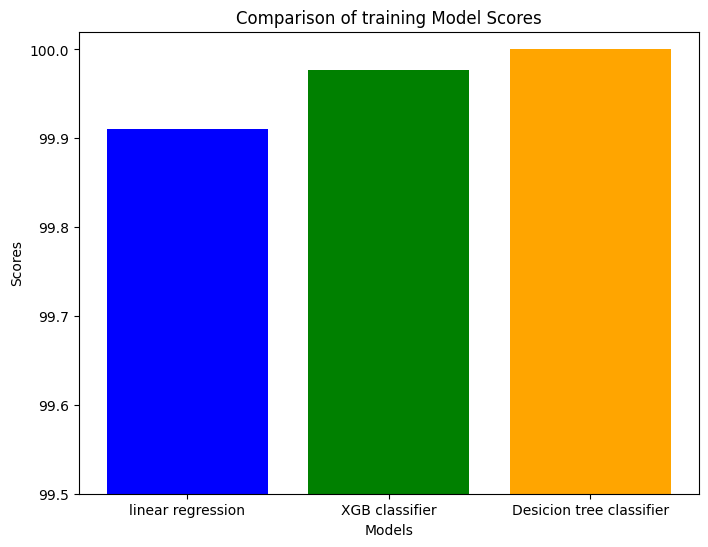

In [40]:
import matplotlib.pyplot as plt

# Define model names and their corresponding scores
model_names = ['linear regression', 'XGB classifier', 'Desicion tree classifier']
model_scores = [log_score1,xgb_score1,dlf_score1]  # Replace with your actual model scores


plt.figure(figsize=(8, 6))
plt.bar(model_names, model_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of training Model Scores')
plt.ylim(99.50,100.02)# Set the y-axis limit to match your score range (0 to 1 in this example)
plt.show()


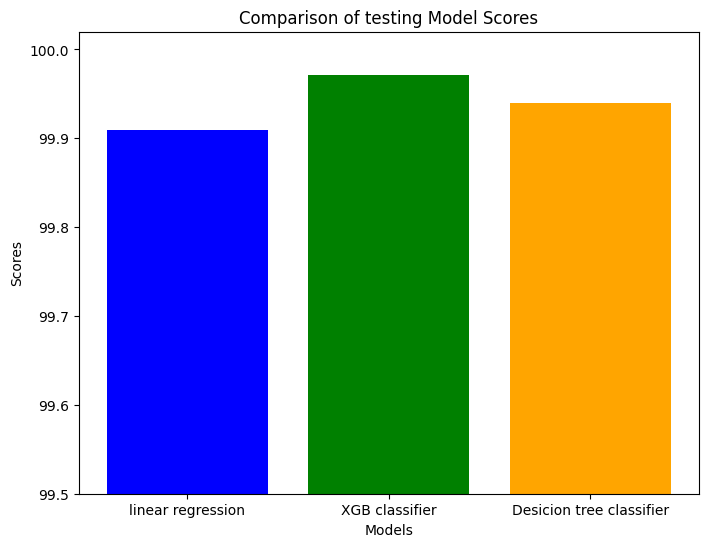

In [41]:
import matplotlib.pyplot as plt

# Define model names and their corresponding scores
model_names = ['linear regression', 'XGB classifier', 'Desicion tree classifier']
model_scores = [log_test,xgb_test,dlf_test]  # Replace with your actual model scores​

plt.figure(figsize=(8, 6))
plt.bar(model_names, model_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of testing Model Scores')
plt.ylim(99.50,100.02)# Set the y-axis limit to match your score range (0 to 1 in this example)
plt.show()


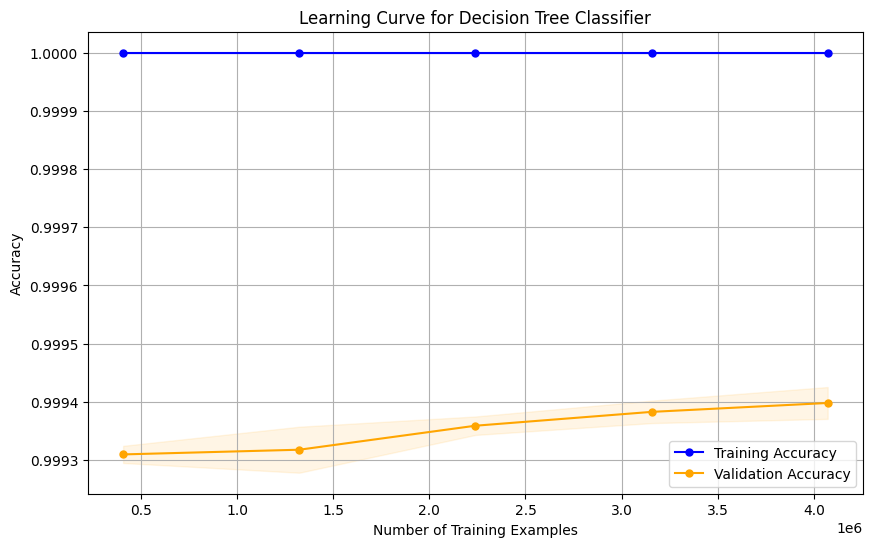

In [42]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(dlf, x_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title('Learning Curve for Decision Tree Classifier')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.grid()

# Plot the learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, marker='o', markersize=5, label='Validation Accuracy', color='orange')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()
